# Kevin Atkin

## Thoughts?

- he has not done much pre processing, no outlier treatments
- statistical tests
- no visualisations

### I liked the way he used loops to perform model fitting AND created a seperate function for pre-processing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import LinearSVR,SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('train.csv',index_col='id')

In [3]:
data.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
id,,,,,,,,,
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5407 entries, 0 to 5406
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            5407 non-null   float64
 1   BlastFurnaceSlag           5407 non-null   float64
 2   FlyAshComponent            5407 non-null   float64
 3   WaterComponent             5407 non-null   float64
 4   SuperplasticizerComponent  5407 non-null   float64
 5   CoarseAggregateComponent   5407 non-null   float64
 6   FineAggregateComponent     5407 non-null   float64
 7   AgeInDays                  5407 non-null   int64  
 8   Strength                   5407 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 422.4 KB


## Pre-Processing

In [5]:
def preprocess_inputs(df):
    df = data.copy()
    
    y = df['Strength'].copy()
    X = df.drop('Strength',axis=1).copy()
    
    #train test split
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,train_size=0.7)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train= pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
    X_test= pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    
    return X_train,X_test,y_train,y_test

In [6]:
X_train,X_test,y_train,y_test = preprocess_inputs(data)

In [7]:
models = {
    "                     Linear Regression": LinearRegression(),
    "                 L2 (Ridge) Regression": Ridge(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Mahcine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                        Neural Network": MLPRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                              AdaBoost": AdaBoostRegressor()
}

for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+ " trained.")

                     Linear Regression trained.
                 L2 (Ridge) Regression trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Mahcine (RBF Kernel) trained.
                         Decision Tree trained.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                              AdaBoost trained.


In [8]:
for name,model in models.items():
    print(name+" R^2:{:.5f}".format(model.score(X_test,y_test)))

                     Linear Regression R^2:0.17517
                 L2 (Ridge) Regression R^2:0.17519
Support Vector Machine (Linear Kernel) R^2:0.16078
   Support Vector Mahcine (RBF Kernel) R^2:0.29192
                         Decision Tree R^2:0.08463
                        Neural Network R^2:0.41131
                         Random Forest R^2:0.35367
                     Gradient Boosting R^2:0.43592
                              AdaBoost R^2:0.36636


## Optimization

In [9]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train,y_train)


params = {
    'learning_rate': [0.01, 0.1, 1.0],
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5]
}

clf = GridSearchCV(best_model, params)
clf.fit(X_train, y_train)

clf.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [10]:
print("Model R^2 (After Optimization): {:.5f}".format(clf.score(X_test, y_test)))

Model R^2 (After Optimization): 0.43589


# sayeed noor

### Renaming columns:
df.columns=[put a list of new names here] 

- so easy -o-

### Ask 6 questions : 
- info
- nulls
- duplicates -> drop 'em if they are there
- describe or visualise the spread
- correlation

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5407 entries, 0 to 5406
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            5407 non-null   float64
 1   BlastFurnaceSlag           5407 non-null   float64
 2   FlyAshComponent            5407 non-null   float64
 3   WaterComponent             5407 non-null   float64
 4   SuperplasticizerComponent  5407 non-null   float64
 5   CoarseAggregateComponent   5407 non-null   float64
 6   FineAggregateComponent     5407 non-null   float64
 7   AgeInDays                  5407 non-null   int64  
 8   Strength                   5407 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 422.4 KB


In [12]:
data.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
data.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<AxesSubplot:>

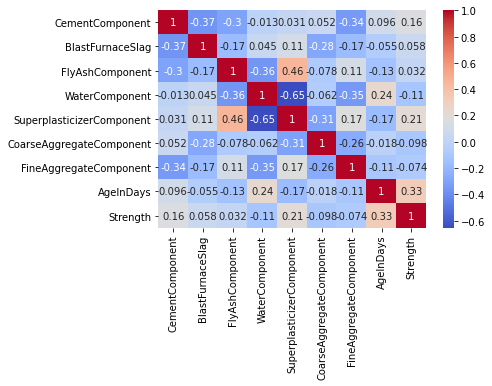

In [15]:
sns.heatmap(data.corr(),annot=True,cbar=True,cmap='coolwarm')